In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/titanic_train2.csv')
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,211536,13.0000,S,Montvila,Rev,Juozas
887,1.0,1,female,19.0,0,0,112053,30.0000,S,Graham,Miss,Margaret Edith
888,0.0,3,female,21.0,1,2,W./C. 6607,23.4500,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,1.0,1,male,26.0,0,0,111369,30.0000,C,Behr,Mr,Karl Howell


In [3]:
df2 = pd.read_csv('data/titanic_test2.csv')
df2

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,3,male,34.5,0,0,330911,7.8292,Q,Kelly,Mr,James
1,3,female,47.0,1,0,363272,7.0000,S,Wilkes,Mrs,James (Ellen Needs)
2,2,male,62.0,0,0,240276,9.6875,Q,Myles,Mr,Thomas Francis
3,3,male,27.0,0,0,315154,8.6625,S,Wirz,Mr,Albert
4,3,female,22.0,1,1,3101298,12.2875,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
414,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
416,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick


### 전처리

In [4]:
# 두 데이터 프레임을 합친다.
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)
total_df

# 인코딩
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()

encoder1.fit(total_df['Sex'])
encoder2.fit(total_df['Ticket'])
encoder3.fit(total_df['Embarked'])
encoder4.fit(total_df['LastName'])
encoder5.fit(total_df['name2'])
encoder6.fit(total_df['FirstName'])

total_df['Sex'] = encoder1.transform(total_df['Sex'])
total_df['Ticket'] = encoder2.transform(total_df['Ticket'])
total_df['Embarked'] = encoder3.transform(total_df['Embarked'])
total_df['LastName'] = encoder4.transform(total_df['LastName'])
total_df['name2'] = encoder5.transform(total_df['name2'])
total_df['FirstName'] = encoder6.transform(total_df['FirstName'])

total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,1,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,1,0,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,3,0,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,1,0,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,3,1,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,1,0,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,3,1,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,3,1,32.0,0,0,579,8.0500,2,827,12,390


In [5]:
# StandardScaler
X1 = total_df.drop('Survived', axis=1)
scaler1 = StandardScaler()
scaler1.fit(X1)

StandardScaler()

In [6]:
# 학습과 예측데이터로 나눈다.
a1 = len(df1)

df10 = total_df.iloc[:a1]
df20 = total_df.iloc[a1:]

In [7]:
# 예측 데이터에서 결과 컬럼을 제거한다.
df20.drop('Survived', axis=1, inplace=True)

In [8]:
# 학습데이터를 입력과 결과로 나눈다.
X = df10.drop('Survived', axis=1)
y = df10['Survived']

In [9]:
# 표준화
X = scaler1.transform(X)

### 차원축소

In [10]:
# pca
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
pca_X

array([[-0.11806056, -1.61807049],
       [ 0.1154458 ,  1.98840982],
       [ 0.71610599, -1.11569349],
       ...,
       [ 2.51117655, -0.93413025],
       [-0.85481329,  1.77466357],
       [-0.95567273, -0.92439043]])

In [11]:
# lda
# lda는 결과데이터의 종류수 보다 적게 줘야 한다.
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)
lda_X = lda.transform(X)
lda_X

array([[-1.36123857],
       [ 2.04906979],
       [ 0.76982402],
       [ 2.09923134],
       [-1.60411472],
       [-1.03830474],
       [-0.52332151],
       [-0.97847014],
       [ 0.6053744 ],
       [ 1.98691775],
       [ 1.02009891],
       [ 1.89408849],
       [-1.36298164],
       [-1.56103669],
       [ 1.22706274],
       [ 1.28705212],
       [-1.00838422],
       [-0.3081458 ],
       [ 0.53327789],
       [ 1.15695842],
       [-0.5152172 ],
       [-0.51731811],
       [ 1.70981492],
       [ 0.04613915],
       [ 0.52113294],
       [ 0.40632384],
       [-0.69004217],
       [ 0.5344318 ],
       [ 1.42258812],
       [-1.36042725],
       [ 0.11316079],
       [ 1.86681425],
       [ 1.19883481],
       [-1.42704864],
       [ 0.4722285 ],
       [ 0.1947487 ],
       [-0.79062009],
       [-0.85176773],
       [ 1.04075773],
       [ 1.4842435 ],
       [ 0.35815196],
       [ 1.17828693],
       [-1.19147919],
       [ 1.88619955],
       [ 1.28477778],
       [-1

### 기본 모델을 통한 교차 검증

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [13]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [14]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [15]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [16]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.7418886373565055
LR 평균 성능 수치 : 0.7234505745492864
SVM 평균 성능 수치 : 0.7688857921790441
DT 평균 성능 수치 : 0.7053895838936148
RF 평균 성능 수치 : 0.7777000310744675
Ada 평균 성능 수치 : 0.7659269503600881
GB 평균 성능 수치 : 0.7573419423769406
LGBM 평균 성능 수치 : 0.7813394912105105
XGB 평균 성능 수치 : 0.7618680641426177


In [17]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [18]:
# 모델 이름 목록
model_name = ['PCA KNN', 'PCA LR', 'PCA SVM', 'PCA DT', 'PCA RF', 'PCA Ada', 
              'PCA GB', 'PCA LGBM', 'PCA XGB']

In [19]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, pca_X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

PCA KNN 평균 성능 수치 : 0.6755557982409501
PCA LR 평균 성능 수치 : 0.5834926729057118
PCA SVM 평균 성능 수치 : 0.695874564140502
PCA DT 평균 성능 수치 : 0.6146092997213498
PCA RF 평균 성능 수치 : 0.6692326329791725
PCA Ada 평균 성능 수치 : 0.6701805804268135
PCA GB 평균 성능 수치 : 0.6800893769168104
PCA LGBM 평균 성능 수치 : 0.6660458893853993
PCA XGB 평균 성능 수치 : 0.6501866768200105


In [20]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [21]:
# 모델 이름 목록
model_name = ['LDA KNN', 'LDA LR', 'LDA SVM', 'LDA DT', 'LDA RF', 'LDA Ada', 
              'LDA GB', 'LDA LGBM', 'LDA XGB']

In [22]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, lda_X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

LDA KNN 평균 성능 수치 : 0.7055088372241556
LDA LR 평균 성능 수치 : 0.7374539825180983
LDA SVM 평균 성능 수치 : 0.7141544350944186
LDA DT 평균 성능 수치 : 0.6469838071790316
LDA RF 평균 성능 수치 : 0.6469838071790316
LDA Ada 평균 성능 수치 : 0.6977427434564122
LDA GB 평균 성능 수치 : 0.700081608295102
LDA LGBM 평균 성능 수치 : 0.70999517581951
LDA XGB 평균 성능 수치 : 0.6981411579680107


### 하이퍼 파라미터 튜닝

In [23]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [24]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [25]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 
              'GB', 'LGBM', 'XGB']

In [26]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.7631302462724896
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.7245370936639745
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.7688857921790441
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 3}
최적의 모델 평균 성능 : 0.7563998264395363
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 100}
최적의 모델 평균 성능 : 0.7777000310744675
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7659269503600881
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.7719351848401853
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.7813394912105105
---------------------

In [27]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(pca_X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'PCA {model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 19}
최적의 모델 평균 성능 : 0.7029138419247078
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.585899226925169
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.695874564140502
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 3}
최적의 모델 평균 성능 : 0.6773968548431204
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 250}
최적의 모델 평균 성능 : 0.6831680410926521
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.6835335882498049
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.6891876343853826
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 1000, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7233238433663269
------------------

In [28]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(lda_X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'LDA {model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 7}
최적의 모델 평균 성능 : 0.7205000914956604
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.7374539825180983
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 0.01}
최적의 모델 평균 성능 : 0.7263030766696927
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 1}
최적의 모델 평균 성능 : 0.7033011987711746
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 100}
최적의 모델 평균 성능 : 0.6469838071790316
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7089422244122001
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 1000, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7143407105519544
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 10000, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7255741803061933
--------------

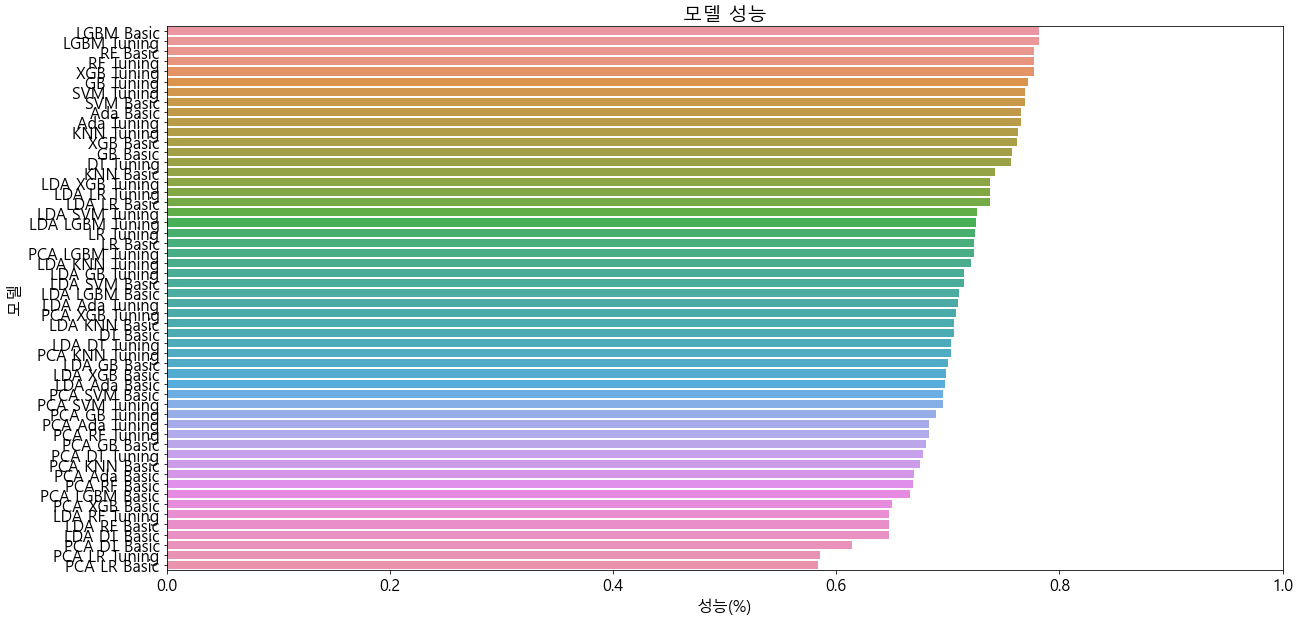

In [29]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

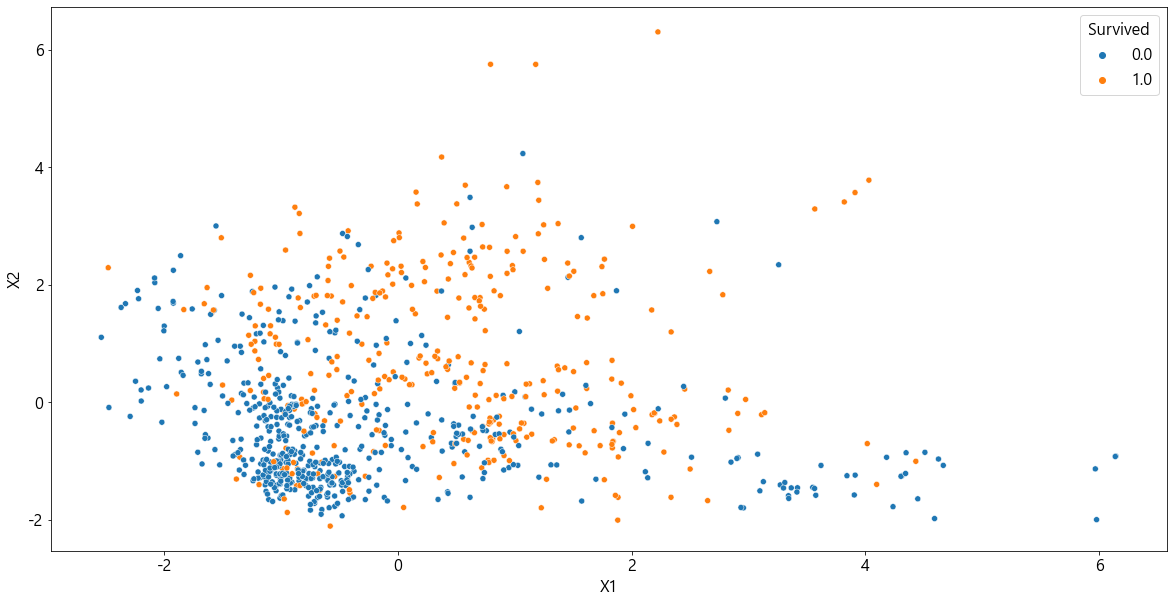

In [34]:
df1000 = pd.DataFrame(pca_X, columns=['X1', 'X2'])
df1000['Survived'] = df1['Survived']

sns.scatterplot(data=df1000, x='X1', y='X2', hue='Survived')
plt.show()